## 1. Metadata exploration


In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray
import contextily as ctx

# 2. Polygon intersection
Open the fire perimeters and the EJI data and do initial data exploration.


Create an exploratory map showing

the census tracts that intersect the Palisades fire perimeter and
the Palisades fire perimeter.
Discuss how big is the Palisades fire perimeter in relation to the census tracts.

Create the corresponding geopandas.GeoDataFrame and exploratory map for the Eaton fire.
Discuss how big is the Eaton fire perimeter in relation to the census tracts intersectig the Eaton fire perimeter.

In [34]:
# Reading in our data
california = gpd.read_file(os.path.join("data/EJI_2024_California/EJI_2024_California.gdb"))

eaton = gpd.read_file(os.path.join("data/EJI_2024_California/eaton_perimeter/Eaton_Perimeter_20250121.shp"))
palisades = gpd.read_file(os.path.join("data/EJI_2024_California/palisades_perimeter/Palisades_Perimeter_20250121.shp"))

In [35]:
print(f"Eaton CRS:, {eaton.crs}")

Eaton CRS:, EPSG:3857


In [36]:
print(f"Eaton CRS:, {palisades.crs}")

Eaton CRS:, EPSG:3857


In [37]:
print(f"Eaton CRS:, {california.crs}")

Eaton CRS:, PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


<Axes: >

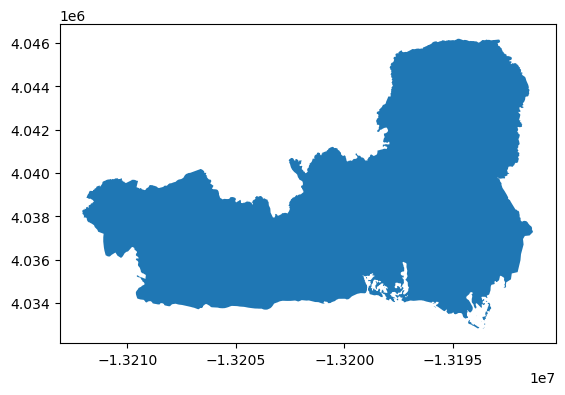

In [38]:
palisades.plot()

<Axes: >

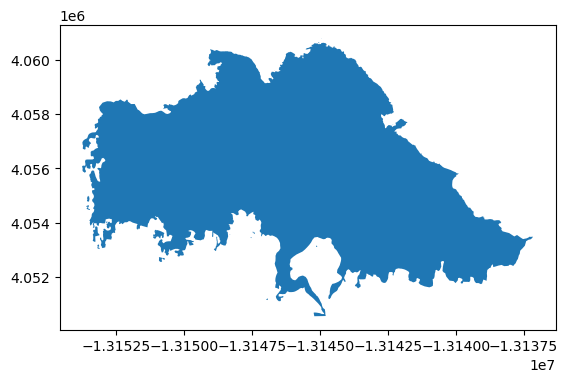

In [39]:
eaton.plot()

<Axes: >

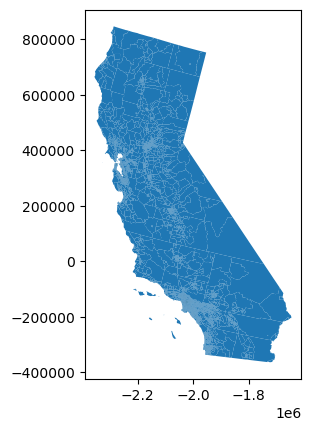

In [40]:
california.plot()

In [43]:
# Match CRS
eaton.crs == palisades.crs  # False

california = california.to_crs(palisades.crs) # Transform CRS

california.crs == palisades.crs # True / Match


True

<Axes: >

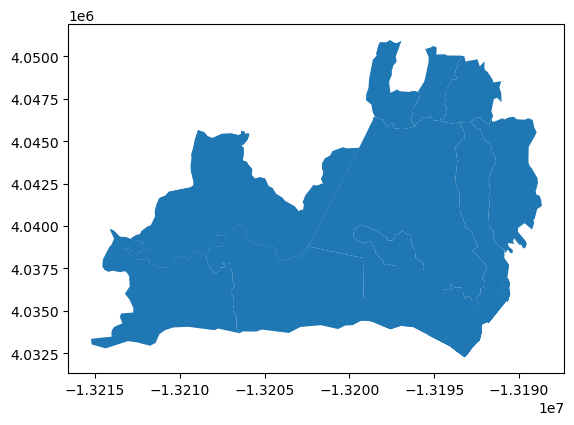

In [49]:
palisadesjoin = gpd.sjoin(california,palisades)
palisadesjoin.head()
palisadesjoin.plot()

### Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

In [47]:
eatonjoin = gpd.sjoin(california, eaton)

<Axes: >

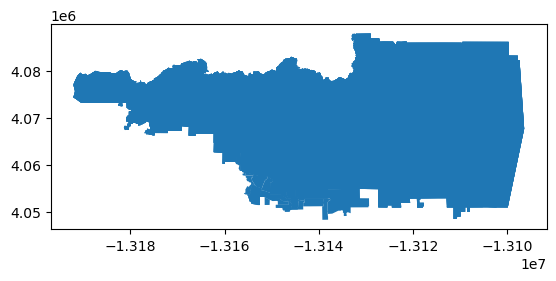

In [48]:
eatonjoin.plot()

## Create an exploratory map showing

the census tracts that intersect the Palisades fire perimeter and
the Palisades fire perimeter.

In [50]:
eatonjoin.head()

,OBJECTID_left,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,OBJECTID_right,type,Shape__Are,Shape__Len
430,7051,06,037,461501,140000US06037461501,06037461501,06037461501,Los Angeles County,California,CA,...,-999,-999,4163.166698,1.004134e+06,"MULTIPOLYGON (((-13151476.223 4053178.837, -13...",1,2,Heat Perimeter,2.071021e+04,839.204218
624,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.662 4074373.822, -13...",17,18,Heat Perimeter,8.314779e+07,97603.986189
624,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.662 4074373.822, -13...",14,15,Heat Perimeter,2.405430e+02,59.202170
624,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.662 4074373.822, -13...",15,16,Heat Perimeter,1.045547e+02,44.121115
624,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.662 4074373.822, -13...",16,17,Heat Perimeter,8.781250e+00,13.404382


# Polygon clipping

In [58]:
palisades_clip = gpd.clip(left_df = california, right_df = palisades, how = "inner")

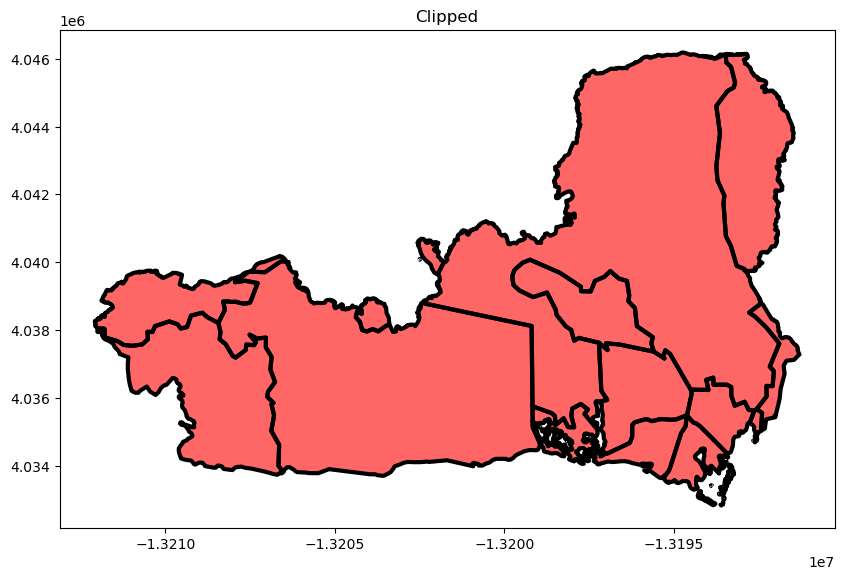

In [119]:
fig, ax = plt.subplots(figsize = (10, 8))
palisades_clip.plot(ax=ax, facecolor = "red", edgecolor = "blue", linewidth = 1, alpha = 0.6)

palisades_clip.plot(ax=ax, color="none", edgecolor = "black", linewidth = 3)

ax.set_title("Clipped")

plt.show()


In [60]:
eaton_clip = gpd.clip(california, eaton)

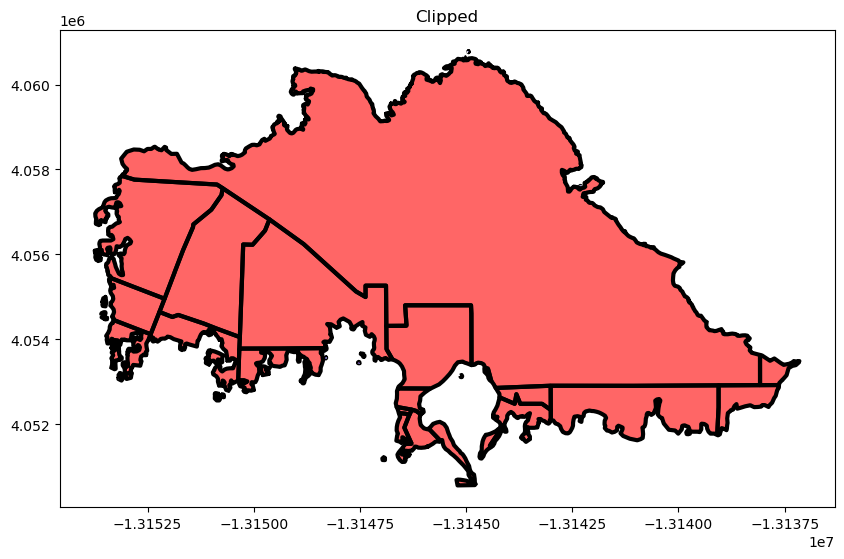

In [120]:
fig, ax = plt.subplots(figsize = (10, 8))
eaton_clip.plot(ax=ax, facecolor = "red", edgecolor = "darkblue", linewidth = 1, alpha = 0.6)

eaton_clip.plot(ax=ax, color="none", edgecolor = "black", linewidth = 3)

ax.set_title("Clipped")


plt.show()


## 4. Visualize fire perimeters with a basemap
- To add a basemap to our plot we will be using the contextily library.

/tmp/ipykernel_2940270/3453717642.py:14: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend([eaton_plt, palisades_plt], ['Line Up', 'Line Down'])


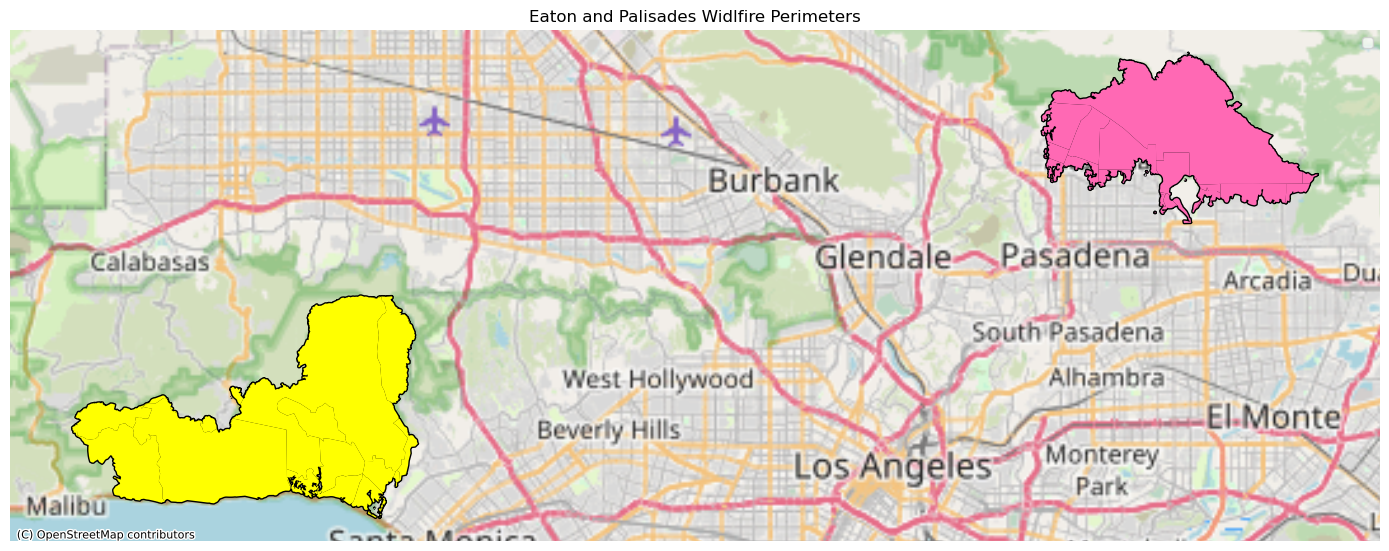

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))


# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
eaton_clip.plot(ax=ax, edgecolor = "black", linewidth= 2)
eaton_plt = eaton_clip.plot(ax=ax, color = "hotpink", label = "Eaton")


palisades_clip.plot(ax=ax, edgecolor = "black", linewidth = 2)
palisades_plt = palisades_clip.plot(ax=ax, color= "yellow", label= "Palisades")


# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE
ax.legend([eaton_plt, palisades_plt], ['Line Up', 'Line Down'])


# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# ADD TITLE
plt.title("Eaton and Palisades Widlfire Perimeters")

ax.axis('off')

plt.tight_layout()
plt.show()

# 5. Visualize EJI data
- Use and update the code below to plot one of the variables you and your team explored in step 1 as being relevant to a community’s response to a wildfire.

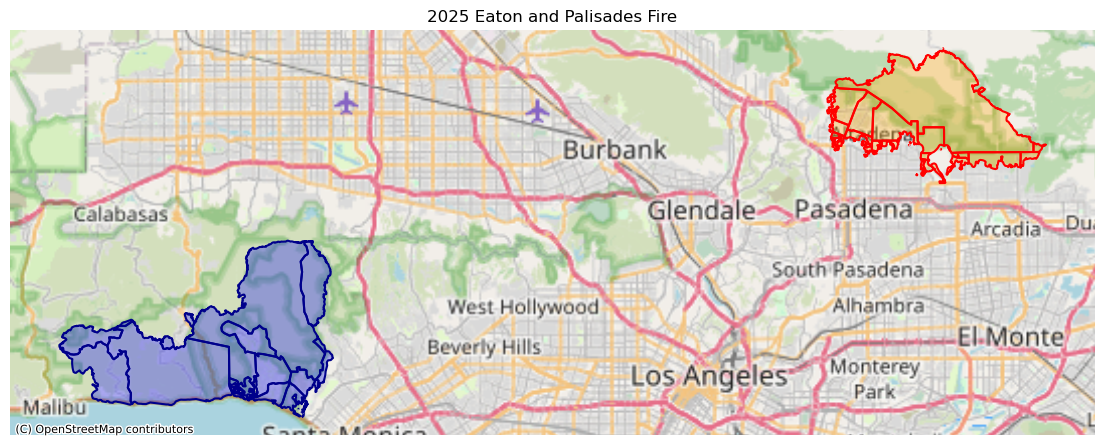

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
eaton_clip.plot(ax=ax, color = 'orange', alpha = 0.3) # Inside
eaton_clip.plot(ax=ax, color = 'none', edgecolor = 'red', linewidth=1.5) # Border
palisades_clip.plot(ax=ax, color = 'blue', alpha = 0.3) # Inside
palisades_clip.plot(ax=ax, color = 'none', edgecolor = 'darkblue', linewidth=1.5)


# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE
#pal_legend = mpatches.Patch(facecolor = "darkblue", edgecolor = "black", label = "Palisades Fire Border")
#easton_legend = mpatches.Patch(facecolor = "orange", edgecolor = "black", label = "Eaton Fire Border")


# ADD TITLE
ax.set_title("2025 Eaton and Palisades Fire")

# Axes off
ax.axis('off')

#plt.tight_layout()

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()